# 1. Import Necessary Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# 2. Import Dataset

In [4]:
df = pd.read_csv('./datasets/gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [5]:
df.shape

(139, 10)

In [6]:
X = df['fertility'].values
y = df['life'].values

# 3. Reshape X and y arrays using Numpy

In [7]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y into one column
y_life = y.reshape(-1,1)
X_fertility = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_life.shape))
print("Dimensions of X after reshaping: {}".format(X_fertility.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


# 4. Training and Calculating R-square (Without Split)
R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:
* 0% indicates none of the data points are near the fitted line.
* 100% indicates all the data points are located exactly on the fitted line.

In general, the higher the R-squared, the better the model fits your data. 

[Source](https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html)

In [8]:
reg = LinearRegression()
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

In [9]:
reg.fit(X_fertility, y_life)
y_pred = reg.predict(prediction_space)
print("The R-Square is {}".format(reg.score(X_fertility, y_life))) # Calculate R-Square

The R-Square is 0.6192442167740035


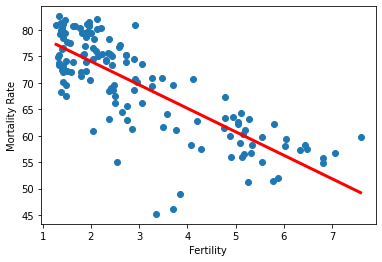

In [10]:
plt.plot(X_fertility,y_life, marker='o', linewidth=0)
plt.plot(prediction_space, y_pred, color='red', linewidth=3)
plt.xlabel("Fertility")
plt.ylabel("Mortality Rate")
plt.show()

# 5. Training with Split

## 5.1 Preparing Data

In [11]:
X = df[["population", "fertility","HIV","CO2","BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

## 5.3 Train Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## 5.3 Make Prediction using Linear Regression Model

In [13]:
y_pred = linreg.predict(X_test)
print("R^2: {}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(rmse))

R^2: 0.8380468731429358
RMSE: 3.2476010800377244


# 6. N-Fold Cross Validation

In [14]:
cv3_score = cross_val_score(reg, X, y, cv=3)
cv5_score = cross_val_score(reg, X, y, cv=5)

# print(cv3_score)
# print(cv5_score)

print("Averafe three-fold CV score is {}".format(np.mean(cv3_score)))
print("Average five-fold CV score is {}".format(np.mean(cv5_score)))

[0.83699524 0.87875694 0.89986165]
[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Averafe three-fold CV score is 0.8718712782622107
Average five-fold CV score is 0.8599627722793233
